In [ ]:
  %matplotlib inline 
from scipy.stats import norm 
import numpy as np # numerical computation packages in python
import matplotlib.pyplot as plt # plotting routines

In [ ]:
#Parameters (n = number of data points), p=(order of polynomial), x=[data points]
n= 17
p =5
rn = np.random.uniform(-2, 2, n)
x = np.reshape(np.sort(rn, axis=0), (n, 1))


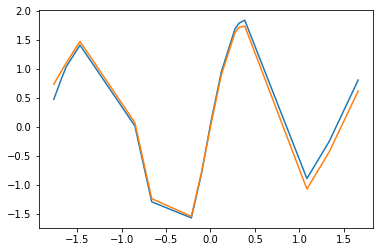

In [ ]:
#Function f(x)
def f(x):
  return np.exp(-x/2)*np.sin(np.pi*x) +np.sin((3*np.pi*x)/2)

#y = f(x) + epsilon
def get_y(func):
  re = np.random.normal(0, 0.5, n)
  ep = np.reshape(np.sort(re, axis=0), (n, 1))
  y = func+ ep
  return y

re = np.random.normal(0, 0.1, n)
ep = np.reshape(np.sort(re, axis=0), (n, 1))
y = f(x)+ ep

plt.plot(x,y)
plt.plot(x,f(x))

In [ ]:
# psi functions 
def gaussian_basis_fn(x, mu, sigma=0.1):
  return np.exp(-0.5 * (x - mu) ** 2 / sigma ** 2)
def polynomial_basis_fn(x, degree):
  return x ** degree

In [ ]:
# design matrix A for polynomial and radial basis
def A_design(x_val,p, bassis_fn,basisfn_locs = None, sigma =0.1):
  if bassis_fn  is polynomial_basis_fn:
    A = polynomial_basis_fn(x_val,0)
    for i in range(1,p+1):
       A =np.concatenate([A,polynomial_basis_fn(x_val,i)],axis =1)
    return A
  elif bassis_fn is gaussian_basis_fn:
    A = np.concatenate([np.ones(x_val.shape)]+[gaussian_basis_fn(x_val, loc,sigma) for loc in basisfn_locs], axis=1)
    return A

test =[(1,2,3,4)]
test = np.reshape(test,(4,1))
print(np.shape(test))
print(A_design(test,4,polynomial_basis_fn))

(4, 1)
[[  1   1   1   1   1]
 [  1   2   4   8  16]
 [  1   3   9  27  81]
 [  1   4  16  64 256]]


In [ ]:
# optimal weight vector w=A.TRANSPOSEa +LAMDA)INVERSEA
def get_w(A,y,lmda =0 ):  
  from numpy.linalg import inv
  mid = inv(np.dot(A.transpose(),A)+lmda*np.identity(p+1))
  print(np.shape(np.dot(mid, A.transpose())))
  w = np.dot(np.dot(mid, A.transpose()),y)
  return w



In [ ]:
#get y_prediction
def y_pred(A,w):
  return np.dot(A,w)

#loss function
def loss(A,w,y):
  return (np.dot(A,w) - y)**2

In [ ]:
#Task print table values of p varying from 0 to 9 table 1.1
p = 17
myA= A_design(x,p,polynomial_basis_fn)
print(np.shape(myA))
print(np.shape(y))
wbest = get_w(myA,y)
print (wbest)


(17, 18)
(17, 1)
(18, 17)
[[   0.64081979]
 [   7.93617179]
 [  -3.96121891]
 [ -30.21817318]
 [  43.35914383]
 [  71.38019706]
 [-183.03488172]
 [-166.58709416]
 [ 263.64124995]
 [ 129.19638579]
 [-241.09649013]
 [  -7.44689274]
 [ 185.49183644]
 [  -3.50001377]
 [ -83.76853138]
 [ -12.0387725 ]
 [  13.970449  ]
 [   3.84884921]]


In [ ]:
#splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x,y, test_size=0.33, random_state=45)


In [ ]:
#train dataset
p=10
myA= A_design(X_train,p,polynomial_basis_fn)
#print(np.shape(myA))
wbest = get_w(myA,y_train)
y_pred(myA,wbest)
y_hat = y_pred(myA,wbest)
#plt.scatter(X_train,y_hat, c='G')
#plt.scatter(X_train, y_train)
F=np.sum(loss(myA,wbest,y_train))
print(F)




(11, 11)
4.7284543253939214e-14


In [ ]:
#test dataset
myA2= A_design(X_test,p,polynomial_basis_fn)
#print(np.shape(myA))
#wbest2 = get_w(myA2,y_test)
y_hat2 = y_pred(myA2,wbest)
#plt.scatter(X_test,y_hat2)
#plt.scatter(X_test, y_test)
F2=np.sum(loss(myA2,wbest,y_test))
print(F2)

2542.152692381402


(1, 11)
(2, 11)
(4, 11)
(10, 11)


Text(0, 0.5, 't')

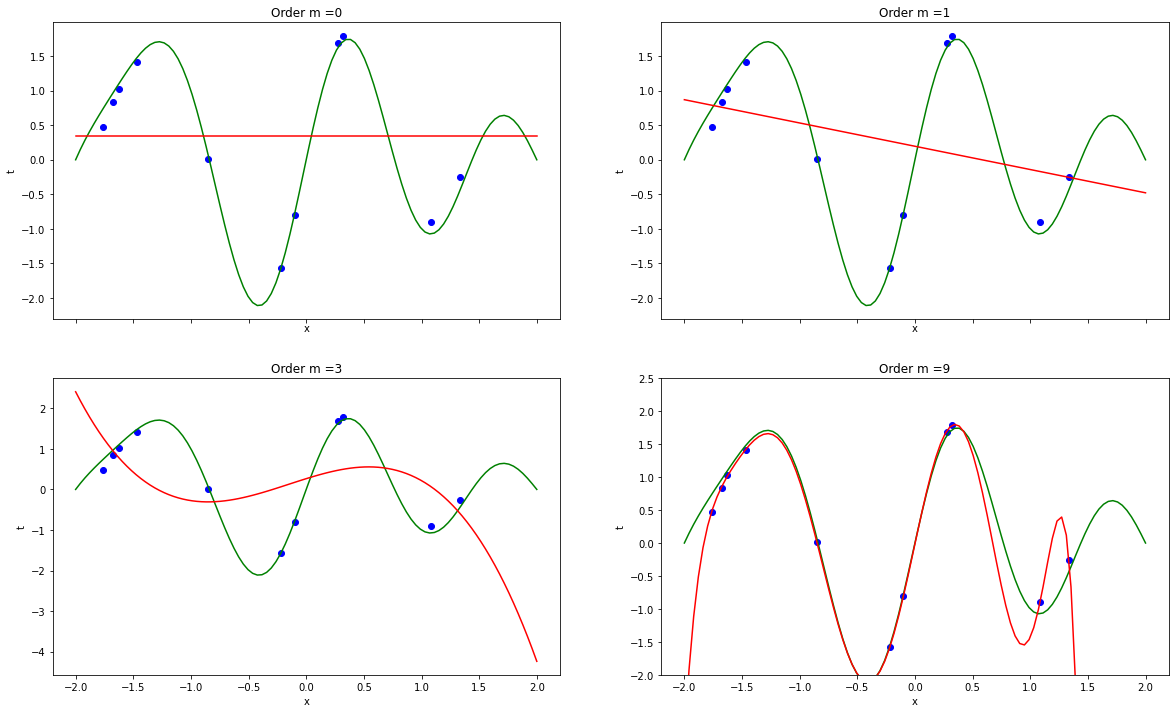

In [ ]:
# implement graphs from coursework --> figure 1.4
fig, axes = plt.subplots(figsize=(20,12),nrows=2, ncols=2,sharex='col')
x_plot= np.reshape(np.linspace(-2,2,100),(100,1))

plt.title("Graphs showing the accuracy of the predicted y values with increasing order of polynomial",fontsize =30,)

#plot for  p =0
p=0

A_plot =A_design(x_plot,p,polynomial_basis_fn)
myA_p0= A_design(X_train,p,polynomial_basis_fn)
wbest_p0 = get_w(myA_p0,y_train)
y_hat_p0 = y_pred(A_plot,wbest_p0)
plt.ylim(-2,2.5)
axes[0][0].plot(x_plot,f(x_plot),c='g')
axes[0][0].scatter(X_train,y_train,c='b')
axes[0][0].plot(x_plot,y_hat_p0,c='r')
axes[0][0].set_title("Order m =0")
axes[0][0].set_xlabel("x")
axes[0][0].set_ylabel("t")

#plot of p = 1
p =1
A_plot1 =A_design(x_plot,p,polynomial_basis_fn)
myA_p1= A_design(X_train,p,polynomial_basis_fn)
wbest_p1 = get_w(myA_p1,y_train)
y_hat_p1 = y_pred(A_plot1,wbest_p1)
plt.ylim(-2,2.5)
axes[0][1].plot(x_plot,f(x_plot),c='g')
axes[0][1].scatter(X_train,y_train,c='b')
axes[0][1].plot(x_plot,y_hat_p1,c='r')
axes[0][1].set_title("Order m =1")
axes[0][1].set_xlabel("x")
axes[0][1].set_ylabel("t")

#plot for p=3
p =3
A_plot2 =A_design(x_plot,p,polynomial_basis_fn)
myA_p3= A_design(X_train,p,polynomial_basis_fn)
wbest_p3 = get_w(myA_p3,y_train)
y_hat_p3 = y_pred(A_plot2,wbest_p3)
plt.ylim(-2,2.5)
axes[1][0].plot(x_plot,f(x_plot),c='g')
axes[1][0].scatter(X_train,y_train,c='b')
axes[1][0].plot(x_plot,y_hat_p3,c='r')
axes[1][0].set_title("Order m =3")
axes[1][0].set_xlabel("x")
axes[1][0].set_ylabel("t")

#plot for p=9
p =9
A_plot3 =A_design(x_plot,p,polynomial_basis_fn)
myA_p9= A_design(X_train,p,polynomial_basis_fn)
wbest_p9 = get_w(myA_p9,y_train)
y_hat_p9 = y_pred(A_plot3,wbest_p9)
plt.ylim(-2,2.5)
axes[1][1].plot(x_plot,f(x_plot),c='g')
axes[1][1].scatter(X_train,y_train,c='b')
axes[1][1].plot(x_plot,y_hat_p9,c='r')
axes[1][1].set_title("Order m =9")
axes[1][1].set_xlabel("x")
axes[1][1].set_ylabel("t")

(1, 20)
(2, 20)
(3, 20)
(4, 20)
(5, 20)
(6, 20)
(7, 20)
(8, 20)
(9, 20)
(10, 20)
(11, 20)
(12, 20)
(13, 20)
(14, 20)
(15, 20)
(16, 20)
(17, 20)


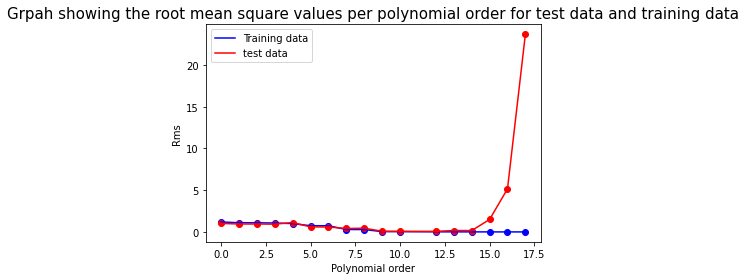

In [ ]:
#Figure 1.5 
M = [0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17]
train_rms =[]
test_rms =[]
for p in range(17):
  #train
  myA= A_design(X_train,p,polynomial_basis_fn)
  wbest = get_w(myA,y_train)
  y_hat = y_pred(myA,wbest)
  F=np.sum(loss(myA,wbest,y_train))
  rms1 = np.sqrt(F/X_train.size)
  train_rms.append(rms1)
  #test
  myA2= A_design(X_test,p,polynomial_basis_fn)
  #wbest2 = get_w(myA2,y_test)
  y_hat2 = y_pred(myA2,wbest)
  F2=np.sum(loss(myA2,wbest,y_test))
  rms2 = np.sqrt(F2/X_test.size)
  test_rms.append(rms2)
plt.title("Grpah showing the root mean square values per polynomial order for test data and training data", fontsize =15)
plt.ylabel("Rms")
plt.xlabel("Polynomial order")
plt.plot(M,train_rms, c='b',label = "Training data")
plt.scatter(M,train_rms,c='b')
plt.plot(M,test_rms,c='r',label ="test data")
plt.scatter(M,test_rms,c='r')
plt.legend()



(18, 30)
21.675306549449996
(18, 201)
0.7022931327820326


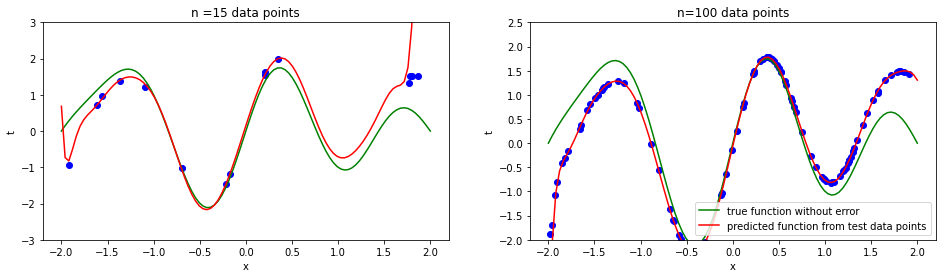

In [ ]:
#Figure 1.6 
# Use of trainign data
fig, axes = plt.subplots(figsize=(16,4),nrows=1, ncols=2,sharex='col')
x_plot= np.reshape(np.linspace(-2,2,100),(100,1))

n= 45 #training value = 15
p =17
rb = np.random.uniform(-2, 2, n)
xn = np.reshape(np.sort(rb, axis=0), (n, 1))
fn = f(xn)
yn= get_y(fn)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( xn,yn, test_size=0.33, random_state=45)

A_f6 =A_design(x_plot,p,polynomial_basis_fn)
myA_p9= A_design(X_train,p,polynomial_basis_fn)
wbest_p9 = get_w(myA_p9,y_train)
y_hat_p9 = y_pred(A_f6,wbest_p9)

F=np.sum(loss(A_f6,wbest_p9,f(x_plot)))
rms1 = np.sqrt(F/15)
print(rms1)



axes[0].set_ylim(-3,3)
axes[0].plot(x_plot,f(x_plot),c='g')
axes[0].scatter(X_test,y_test,c='b')
axes[0].plot(x_plot,y_hat_p9,c='r')
axes[0].set_title("n =15 data points")
axes[0].set_xlabel("x")
axes[0].set_ylabel("t")

#For 100 points

n= 300 #training value = 100
p =17
rb = np.random.uniform(-2, 2, n)
xn = np.reshape(np.sort(rb, axis=0), (n, 1))
fn = f(xn)
yn= get_y(fn)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( xn,yn, test_size=0.33, random_state=45)

A_f6 =A_design(x_plot,p,polynomial_basis_fn)
myA_p9= A_design(X_train,p,polynomial_basis_fn)
wbest_p9 = get_w(myA_p9,y_train)
y_hat_p9 = y_pred(A_f6,wbest_p9)

F3=np.sum(loss(A_f6,wbest_p9,f(x_plot)))
rms2 = np.sqrt(F3/100)
print(rms2)




plt.ylim(-2,2.5)
axes[1].plot(x_plot,f(x_plot),c='g', label ="true function without error")
axes[1].scatter(X_test,y_test,c='b')
axes[1].plot(x_plot,y_hat_p9,c='r',label ="predicted function from test data points")
axes[1].set_title("n=100 data points")
axes[1].set_xlabel("x")
axes[1].set_ylabel("t")
axes[1].legend()




(10, 20)
(10, 20)
(10, 20)


Text(0, 0.5, 't')

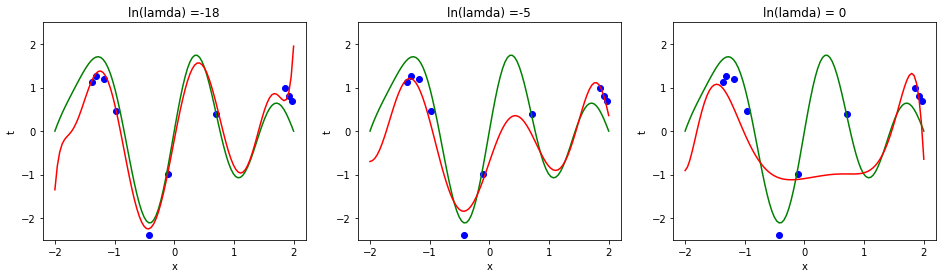

In [ ]:
#Figure 1.7
fig, axes = plt.subplots(figsize=(16,4),nrows=1, ncols=3,sharex='col')
x_plot= np.reshape(np.linspace(-2,2,100),(100,1))

n= 30 #training value = 15
p =9
rb = np.random.uniform(-2, 2, n)
xn = np.reshape(np.sort(rb, axis=0), (n, 1))
fn = f(xn)
yn= get_y(fn)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( xn,yn, test_size=0.33, random_state=45)

A_f6 =A_design(x_plot,p,polynomial_basis_fn)
myA_p9= A_design(X_train,p,polynomial_basis_fn)
wbest_p9 = get_w(myA_p9,y_train,np.exp(-18))
y_hat_p9 = y_pred(A_plot3,wbest_p9)
axes[0].set_ylim(-2.5,2.5)
axes[0].plot(x_plot,f(x_plot),c='g')
axes[0].scatter(X_test,y_test,c='b')
axes[0].plot(x_plot,y_hat_p9,c='r')
axes[0].set_title("ln(lamda) =-18")
axes[0].set_xlabel("x")
axes[0].set_ylabel("t")

A_f6 =A_design(x_plot,p,polynomial_basis_fn)
myA_p9= A_design(X_train,p,polynomial_basis_fn)
wbest_p9 = get_w(myA_p9,y_train,np.exp(-5))
y_hat_p9 = y_pred(A_plot3,wbest_p9)
axes[1].set_ylim(-2.5,2.5)
axes[1].plot(x_plot,f(x_plot),c='g')
axes[1].scatter(X_test,y_test,c='b')
axes[1].plot(x_plot,y_hat_p9,c='r')
axes[1].set_title("ln(lamda) =-5")
axes[1].set_xlabel("x")
axes[1].set_ylabel("t")

A_f6 =A_design(x_plot,p,polynomial_basis_fn)
myA_p9= A_design(X_train,p,polynomial_basis_fn)
wbest_p10 = get_w(myA_p9,y_train,1)
y_hat_p9 = y_pred(A_plot3,wbest_p10)
axes[2].set_ylim(-2.5,2.5)
axes[2].plot(x_plot,f(x_plot),c='g')
axes[2].scatter(X_test,y_test,c='b')
axes[2].plot(x_plot,y_hat_p9,c='r')
axes[2].set_title("ln(lamda) = 0")
axes[2].set_xlabel("x")
axes[2].set_ylabel("t")


In [ ]:
A_f6 =A_design(x_plot,p,polynomial_basis_fn)
myA_p9= A_design(X_train,p,polynomial_basis_fn,0)
wbest_p11 = get_w(myA_p9,y_train)
print(wbest_p9)
print("\n")
print(wbest_p10)
print("\n")
print(wbest_p11)

(10, 20)
[[-0.71399934]
 [ 3.98888842]
 [-0.37448249]
 [-8.67763633]
 [ 1.20703144]
 [ 5.28615502]
 [-0.44919375]
 [-1.22303273]
 [ 0.0448302 ]
 [ 0.09641257]]


[[-1.09227186]
 [ 0.20407845]
 [ 0.21717813]
 [-0.58899034]
 [ 0.41389252]
 [-0.38385746]
 [-0.03072519]
 [ 0.38693542]
 [-0.02034937]
 [-0.06408169]]


[[ -0.20445   ]
 [  7.09909003]
 [ -1.0631172 ]
 [-16.43223771]
 [  1.81405636]
 [ 11.51600102]
 [ -0.7188743 ]
 [ -3.21640264]
 [  0.08492923]
 [  0.31659837]]


(10, 67)
(10, 67)
(10, 67)
(10, 67)
(10, 67)
(10, 67)
(10, 67)
(10, 67)
(10, 67)
(10, 67)
(10, 67)
(10, 67)
(10, 67)
(10, 67)
(10, 67)
(10, 67)
(10, 67)
(10, 67)
(10, 67)
(10, 67)


Text(0.5, 0, 'ln(lambda)')

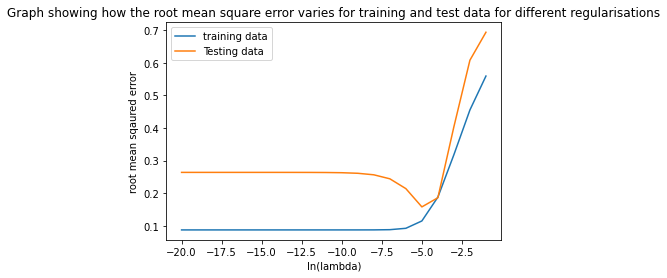

In [ ]:
n= 100 #training value = 15
p =9
rb = np.random.uniform(-2, 2, n)
xn = np.reshape(np.sort(rb, axis=0), (n, 1))
fn = f(xn)
yn= get_y(fn)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( xn,yn, test_size=0.33, random_state=45)



lambda_val = []
rmse_train =[]
rmse_test = []
for _ in range(-20,0):
  lambda_val.append(_)

for x in lambda_val:
  myA= A_design(X_train,p,polynomial_basis_fn)
  wbest = get_w(myA,y_train,np.exp(x))
  y_hat = y_pred(myA,wbest)
  F=np.sum(loss(myA,wbest,y_train))
  rms1 = np.sqrt(F/X_train.size)
  rmse_train.append(rms1)
  #test
  myA2= A_design(X_test,p,polynomial_basis_fn)
  #wbest2 = get_w(myA2,y_test,np.exp(x))
  y_hat2 = y_pred(myA2,wbest)
  F2=np.sum(loss(myA2,wbest,y_test))
  rms2 = np.sqrt(F2/X_test.size)
  rmse_test.append(rms2)

plt.plot(lambda_val,rmse_train,label="training data")
plt.plot(lambda_val,rmse_test,label ="Testing data")
plt.legend()
plt.title("Graph showing how the root mean square error varies for training and test data for different regularisations")
plt.ylabel("root mean sqaured error")
plt.xlabel("ln(lambda)")


In [ ]:
#Gaussian radial basis claculation


(31, 20)
41.569183357463906
1454106116891212.8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  func(*args, **kwargs)


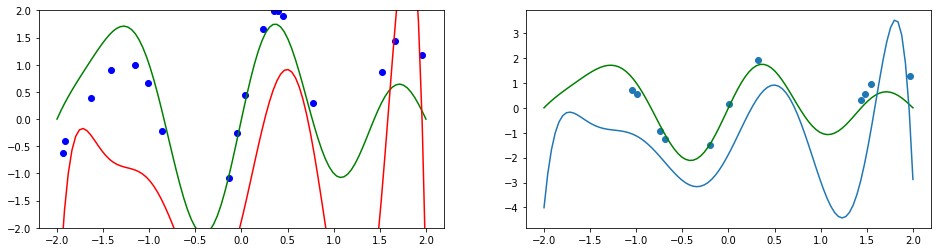

In [ ]:

fig, axes = plt.subplots(figsize=(16,4),nrows=1, ncols=2,sharex='col')
x_plot= np.reshape(np.linspace(-2,2,100),(100,1))

##train dataset
n = 31
p =30
rn = np.random.uniform(-2, 2, p)
centres = np.reshape(np.sort(rn,axis=0),(p,1))
rc = np.random.uniform(-2, 2, n)
xn = np.reshape(np.sort(rc, axis=0), (n, 1))
fn = f(xn)
yn =get_y(fn)



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( xn,yn, test_size=0.33, random_state=45)

#######

myAplt =A_design(x_plot,p,gaussian_basis_fn,centres,2)
myA= A_design(X_train,p,gaussian_basis_fn,centres,2)
wbest = get_w(myA,y_train)

axes[0].set_ylim(-2,2)
y_hat = y_pred(myAplt,wbest)
axes[0].plot(x_plot,f(x_plot),c='G')
axes[0].plot(x_plot,y_hat, c='R')
axes[0].scatter(X_train, y_train,c='B')
F=np.sum(loss(myA,wbest,y_train))
print(F)

#test dataset

myA2= A_design(X_test,p,gaussian_basis_fn,centres)
#wbest2 = get_w(myA2,y_test)
y_pred(myA2,wbest)
y_hat2 = y_pred(myAplt,wbest)
axes[1].plot(x_plot,f(x_plot),c='G')
axes[1].plot(x_plot,y_hat2)
axes[1].scatter(X_test, y_test)
F2=np.sum(loss(myA2,wbest,y_test))
print(F2)



(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(

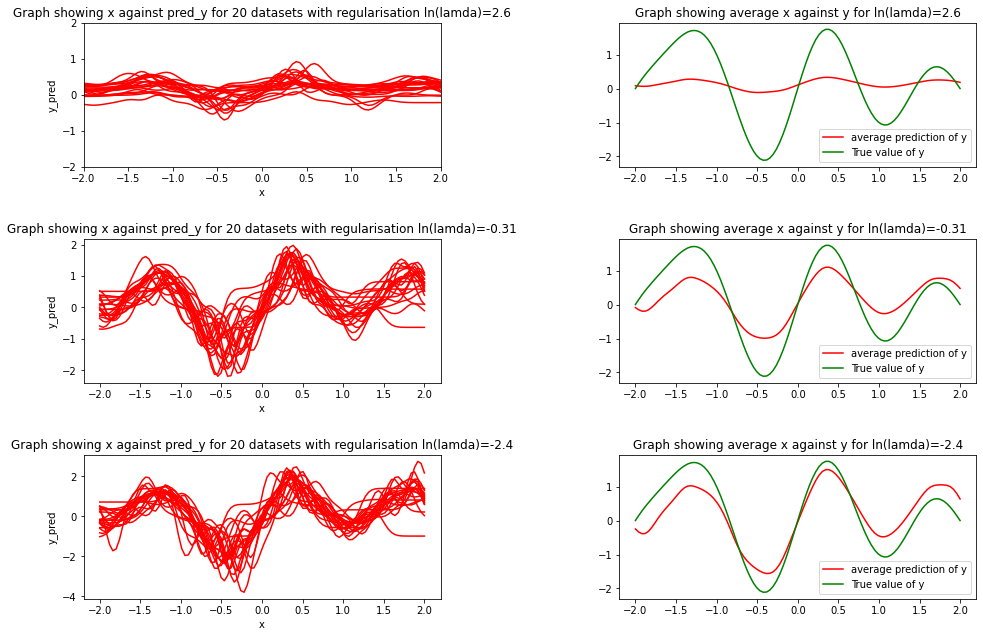

In [ ]:
epoch =100
fig, axes = plt.subplots(figsize=(16,10),nrows=3, ncols=2)
x_plot= np.reshape(np.linspace(-2,2,100),(100,1))

avr =[]
for i in range(epoch):
  n = 25
  p =24
  rn = np.random.uniform(-2, 2, p)
  centres = np.reshape(np.sort(rn,axis=0),(p,1))
  rc = np.random.uniform(-2, 2, n)
  xn = np.reshape(np.sort(rc, axis=0), (n, 1))
  fn = f(xn)
  yn =get_y(fn)

  myAplt =A_design(x_plot,p,gaussian_basis_fn,centres)
  myA= A_design(xn,p,gaussian_basis_fn,centres)
  wbest = get_w(myA,yn,np.exp(2.6))
  wbest2 =get_w(myA,yn,np.exp(-0.31))
  wbest3 = get_w(myA,yn,np.exp(-2.4))

  axes[0][0].set_ylim(-2,2)
  axes[0][0].set_xlim(-2,2)
  y_hat = y_pred(myAplt,wbest)
  y_hat2 = y_pred(myAplt,wbest2)
  y_hat3 = y_pred(myAplt,wbest3)



  if(i == 0):
    avr =0
    avr2 =0
    avr3=0
  else:
    avr = (avr +y_hat)
    avr2 = avr2+y_hat2
    avr3 = avr3+y_hat3

  if i < 21:
      plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)
      axes[0][0].set_title("Graph showing x against pred_y for 20 datasets with regularisation ln(lamda)=2.6")
      axes[0][0].set_xlabel("x")
      axes[0][0].set_ylabel("y_pred")
      axes[0][0].plot(x_plot,y_hat, c='R')
      axes[1][0].set_title("Graph showing x against pred_y for 20 datasets with regularisation ln(lamda)=-0.31")
      axes[1][0].set_xlabel("x")
      axes[1][0].set_ylabel("y_pred")
      axes[1][0].plot(x_plot,y_hat2, c='R')
      axes[2][0].set_title("Graph showing x against pred_y for 20 datasets with regularisation ln(lamda)=-2.4")
      axes[2][0].set_xlabel("x")
      axes[2][0].set_ylabel("y_pred")
      axes[2][0].plot(x_plot,y_hat3, c='R')
  

axes[0][1].set_title("Graph showing average x against y for ln(lamda)=2.6")
axes[0][1].plot(x_plot,avr/epoch,c='R',label="average prediction of y")
axes[0][1].plot(x_plot,f(x_plot),c='G',label="True value of y")
axes[0][1].legend()

axes[1][1].set_title("Graph showing average x against y for ln(lamda)=-0.31")
axes[1][1].plot(x_plot,avr2/epoch, c='R',label="average prediction of y")
axes[1][1].plot(x_plot,f(x_plot),c='G',label="True value of y")
axes[1][1].legend()

axes[2][1].set_title("Graph showing average x against y for ln(lamda)=-2.4")
axes[2][1].plot(x_plot,avr3/epoch, c='R',label="average prediction of y")
axes[2][1].plot(x_plot,f(x_plot),c='G',label="True value of y")
axes[2][1].legend()

